In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [51]:
x =  glob.glob('face_mini/*/*')
img = image.load_img(x[0], (70,70,3), interpolation="nearest")
img = img_to_array(img)
print(img.shape)
img2 = cv2.imread(x[0])
print(img2.shape)

(250, 250, 1)
(250, 250, 3)


(250, 250, 1)
(250, 250, 1)


(-0.5, 249.5, 249.5, -0.5)

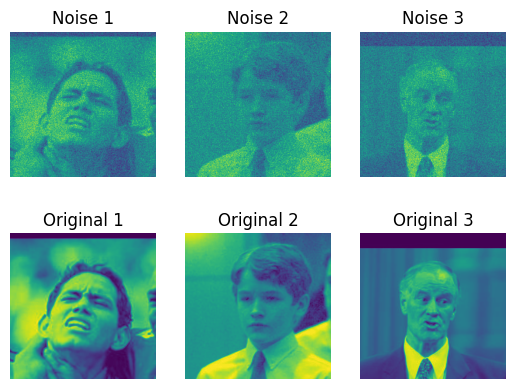

In [46]:
import matplotlib.pyplot as plt

imgs = []

img_h, img_w = 70, 70
for fname in glob.glob('face_mini/*/*.jpg'):
    # print(fname)
    target_size = (img_h,img_w,3)
    img = image.load_img(fname, target_size, interpolation="nearest") # target_size ไม่ควรเกิน (100,100)
    img = img_to_array(img)
    img = img/255
    imgs.append(img)
print(imgs[-1].shape)
train_x, test_x = train_test_split(imgs, random_state=42, test_size=0.3)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)

noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=imgs[0].shape) )

# img_uint8 = (train_x_noise[0] * 255).astype(np.uint8)
# cv2.cvtColor(img_uint8,cv2.COLOR_BGR2RGB)
print(train_x_noise[0].shape)
plt.subplot(231)
plt.imshow(train_x_noise[0])
plt.title('Noise 1')
plt.axis('off')

plt.subplot(232)
plt.imshow(train_x_noise[1])
plt.title('Noise 2')
plt.axis('off')

plt.subplot(233)
plt.imshow(train_x_noise[2])
plt.title('Noise 3')
plt.axis('off')

plt.subplot(234)
plt.imshow(train_x[0])
plt.title('Original 1')
plt.axis('off')

plt.subplot(235)
plt.imshow(train_x[1])
plt.title('Original 2')
plt.axis('off')

plt.subplot(236)
plt.imshow(train_x[2])
plt.title('Original 3')
plt.axis('off')